# Results and DSS Operations

This notebook demonstrates DSS file operations and results extraction:

| Class | Purpose |
|-------|--------|
| `HmsDss` | Low-level DSS file operations (catalog, read, write) |
| `HmsResults` | High-level results extraction (peak flows, hydrographs, volumes) |

## Prerequisites

DSS operations require:
- Java 8+ JDK/JRE installed
- `pyjnius` package (`pip install pyjnius`)

The HEC Monolith libraries are auto-downloaded on first use.

**Estimated Time**: 5-10 minutes (longer on first run due to library downloads)

In [1]:
# pip install hms-commander

**For Development**: If working on hms-commander source code, use the `hmscmdr_local` conda environment (editable install) instead of pip install.

In [2]:
from pathlib import Path
from hms_commander import (
    HmsExamples,
    init_hms_project,
    HmsCmdr,
    HmsDss,
    HmsResults
)

print("hms-commander loaded")

# Check if DSS operations are available
dss_available = HmsDss.is_available()
print(f"DSS operations available: {dss_available}")

if not dss_available:
    print("\nNote: DSS operations require Java and pyjnius.")
    print("Install with: pip install pyjnius")
    print("Ensure JAVA_HOME is set to a Java 8+ JDK.")

hms-commander loaded
DSS operations available: True


## Understanding DSS Pathname Structure

DSS files store time series using a 6-part pathname structure:

```
/A-Part/B-Part/C-Part/D-Part/E-Part/F-Part/
  |       |       |       |       |       |
  |       |       |       |       |       +-- F: User-defined (run name or scenario)
  |       |       |       |       +---------- E: Time interval (5MIN, 1HOUR, 1DAY)
  |       |       |       +------------------ D: Time window (start date: 01JAN2024)
  |       |       +-------------------------- C: Parameter (FLOW, PRECIP, STAGE)
  |       +---------------------------------- B: Location/Element (OUTLET, REACH-1)
  +------------------------------------------ A: Project/Basin (often empty in HMS)
```

### HMS-Specific Conventions

| Part | HMS Usage | Example |
|------|-----------|---------|
| A | Usually empty or project name | `""` or `TIFTON` |
| B | Element name (subbasin, reach, junction) | `OUTLET`, `SUBBASIN-1` |
| C | Parameter type | `FLOW`, `PRECIP-INC`, `DEPTH` |
| D | Start date of record | `16JAN1973`, `01AUG2017` |
| E | Time interval | `5MIN`, `15MIN`, `1HOUR` |
| F | Run name (HMS) | `RUN:CURRENT`, `RUN:1PCT` |

### Finding Data in DSS

```python
# Filter catalog for specific data types
flow_paths = [p for p in catalog if 'FLOW' in p and 'OBSERVED' not in p]
precip_paths = [p for p in catalog if 'PRECIP' in p]
outlet_paths = [p for p in catalog if 'OUTLET' in p]
```

## 1. Extract Example Project and Generate Results

In [3]:
# Extract the tifton example project
project_path = HmsExamples.extract_project(
    "tifton",
    output_path=Path.cwd() / 'hms_example_projects' / 'tifton_results_dss'
)

print(f"Project extracted to: {project_path}")

# Initialize project
hms = init_hms_project(project_path)
print(f"\nProject: {hms.project_name}")
print(f"Available runs: {hms.list_run_names()}")

2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.10 at C:\Program Files\HEC\HEC-HMS\4.10


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.11 at C:\Program Files\HEC\HEC-HMS\4.11


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.12 at C:\Program Files\HEC\HEC-HMS\4.12


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.13 at C:\Program Files\HEC\HEC-HMS\4.13


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.4.1 at C:\Program Files\HEC\HEC-HMS\4.4.1


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.5 at C:\Program Files\HEC\HEC-HMS\4.5


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.6 at C:\Program Files\HEC\HEC-HMS\4.6


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.7.1 at C:\Program Files\HEC\HEC-HMS\4.7.1


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.8 at C:\Program Files\HEC\HEC-HMS\4.8


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.9 at C:\Program Files\HEC\HEC-HMS\4.9


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.0.0 at C:\Program Files (x86)\HEC\HEC-HMS\3.0.0


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.0.1 at C:\Program Files (x86)\HEC\HEC-HMS\3.0.1


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.1.0 at C:\Program Files (x86)\HEC\HEC-HMS\3.1.0


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.2 at C:\Program Files (x86)\HEC\HEC-HMS\3.2


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.3 at C:\Program Files (x86)\HEC\HEC-HMS\3.3


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.4 at C:\Program Files (x86)\HEC\HEC-HMS\3.4


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 3.5 at C:\Program Files (x86)\HEC\HEC-HMS\3.5


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.0 at C:\Program Files (x86)\HEC\HEC-HMS\4.0


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.1 at C:\Program Files (x86)\HEC\HEC-HMS\4.1


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.2.1 at C:\Program Files (x86)\HEC\HEC-HMS\4.2.1


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found HMS 4.3 at C:\Program Files (x86)\HEC\HEC-HMS\4.3


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Found 21 HMS installation(s) with examples


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Catalog built: 68 project entries


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Using latest installed version: 4.13


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Removing existing project folder: C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Extracting 'tifton' from HMS 4.13


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Source: C:\Program Files\HEC\HEC-HMS\4.13\samples.zip


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Destination: C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton


2026-01-08 13:26:37 - hms_commander.HmsExamples - INFO - Successfully extracted 'tifton' to C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO - HMS project initialized: tifton


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Version: 4.13


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Basin models: 1


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Met models: 1


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Control specs: 1


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Simulation runs: 1


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Gages: 2


2026-01-08 13:26:37 - hms_commander.HmsPrj - INFO -   Paired data tables: 0


Project extracted to: C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton

Project: tifton
Available runs: ['1970 simulation']


In [4]:
# Execute a run to generate DSS results (if needed)
run_name = hms.list_run_names()[0]
dss_file = hms.get_run_dss_file(run_name)

print(f"Run: {run_name}")
print(f"DSS file: {dss_file}")
print(f"DSS exists: {dss_file.exists() if dss_file else False}")

# Run HMS if DSS doesn't exist
if dss_file and not dss_file.exists():
    print(f"\nExecuting {run_name} to generate DSS results...")
    try:
        result = HmsCmdr.compute_run(run_name, hms_object=hms)
        if result.success:
            print(f"[OK] Completed in {result.execution_time:.1f}s")
        else:
            print(f"[FAILED] {result.error_message}")
    except Exception as e:
        print(f"[SKIP] HMS execution not available: {e}")

Run: 1970 simulation
DSS file: C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton\1970_simulation.dss
DSS exists: True


## 2. DSS File Information

Get metadata about the DSS file.

In [5]:
if dss_available and dss_file and dss_file.exists():
    # Get DSS file info
    info = HmsDss.get_info(str(dss_file))
    
    print("DSS File Information:")
    print("=" * 60)
    for key, value in info.items():
        print(f"  {key}: {value}")
else:
    print("DSS file not available for analysis")

2026-01-08 13:26:37 - hms_commander.dss.core - INFO - Configured JVM with max memory: 4G


Configuring Java VM for DSS operations...
  Found Java: C:\Program Files\Java\jre1.8.0_471
[OK] Java VM configured


DSS File Information:
  file_path: C:\GH\hms-commander\examples\hms_example_projects\tifton_results_dss\tifton\1970_simulation.dss
  file_exists: True
  file_size_mb: 1.26
  num_paths: 199
  path_types: {'FLOW-OBSERVED': 6, 'STORAGE-GW-1': 6, 'PRECIP-INC': 6, 'FLOW-UNIT GRAPH': 1, 'EXCESS-CANOPY': 6, 'ET-CANOPY': 6, 'ET-POTENTIAL': 6, 'STORAGE-CANOPY': 6, 'PRECIP-EXCESS': 6, 'PRECIP-CUM': 6, 'INFILTRATION': 6, 'STORAGE-SURFACE': 6, 'PRECIP-LOSS': 6, 'OUTFLOW-GW-1': 6, 'FLOW-RESIDUAL': 6, 'PERC-GW-1': 6, 'OUTFLOW-GW-2': 6, 'FLOW-DIRECT': 6, 'PERC-GW-2': 6, 'STORAGE-GW-2': 6, 'FLOW-CUMULATIVE': 12, 'FLOW-BASE': 6, 'FLOW': 12, 'FLOW-COMBINE': 6, 'PRECIP-EXCESS-CUM': 6, 'ET-SURFACE': 6, 'PRECIP-LOSS-CUM': 6, 'STORAGE-SOIL': 6, 'PERC-SOIL': 6, 'SATURATION FRACTION': 6, 'AQUIFER RECHARGE': 6, 'FLOW-OBSERVED-CUMULATIVE': 6}
  dss_available: True


## 3. DSS Catalog Exploration

The catalog lists all pathnames (data records) in the DSS file.

In [6]:
if dss_available and dss_file and dss_file.exists():
    # Get DSS catalog
    catalog = HmsDss.get_catalog(str(dss_file))
    
    print(f"DSS Catalog ({len(catalog)} pathnames):")
    print("=" * 60)
    
    # Show first 15 pathnames
    for path in catalog[:15]:
        print(f"  {path}")
    
    if len(catalog) > 15:
        print(f"  ... and {len(catalog) - 15} more")
else:
    print("DSS catalog not available")

DSS Catalog (199 pathnames):
  //STATION I/FLOW-OBSERVED/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01FEB1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01MAR1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01APR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/STORAGE-GW-1/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01MAY1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01JUN1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01FEB1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01MAR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01APR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01MAY1970/1HOUR/RUN:1970 SIMULATION/
  //74006/PRECIP-INC/01JUN1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW-UNIT GRAPH/TS-PATTERN/1HOUR/RUN:1970 SIMULATION/
  //74006/EXCESS-CANOPY/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  ... and 184 more


### Filter Catalog by Data Type

In [7]:
if dss_available and dss_file and dss_file.exists():
    # Filter for different data types
    flow_paths = [p for p in catalog if 'FLOW' in p.upper()]
    precip_paths = [p for p in catalog if 'PRECIP' in p.upper()]
    depth_paths = [p for p in catalog if 'DEPTH' in p.upper()]
    
    print("Pathnames by Data Type:")
    print("=" * 60)
    print(f"  Flow:          {len(flow_paths)} paths")
    print(f"  Precipitation: {len(precip_paths)} paths")
    print(f"  Depth/Stage:   {len(depth_paths)} paths")
    
    # Show flow paths
    if flow_paths:
        print("\nFlow Pathnames:")
        for path in flow_paths[:10]:
            print(f"  {path}")

Pathnames by Data Type:
  Flow:          73 paths
  Precipitation: 36 paths
  Depth/Stage:   0 paths

Flow Pathnames:
  //STATION I/FLOW-OBSERVED/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01FEB1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01MAR1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01APR1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01MAY1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-OBSERVED/01JUN1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW-UNIT GRAPH/TS-PATTERN/1HOUR/RUN:1970 SIMULATION/
  //74006/OUTFLOW-GW-1/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //STATION I/FLOW-RESIDUAL/01MAR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/OUTFLOW-GW-1/01FEB1970/1HOUR/RUN:1970 SIMULATION/


## 4. Read Time Series Data

Read individual time series from the DSS file.

In [8]:
if dss_available and dss_file and dss_file.exists() and flow_paths:
    # Read first flow time series
    pathname = flow_paths[0]
    print(f"Reading: {pathname}")
    print("=" * 60)
    
    df = HmsDss.read_timeseries(str(dss_file), pathname)
    
    print(f"\nTime Series Properties:")
    print(f"  Shape: {df.shape}")
    print(f"  Time range: {df.index.min()} to {df.index.max()}")
    print(f"  Units: {df.attrs.get('units', 'N/A')}")
    print(f"  Data type: {df.attrs.get('data_type', 'N/A')}")
    
    print(f"\nFirst 10 values:")
    display(df.head(10))
else:
    print("Time series reading not available")

Reading: //STATION I/FLOW-OBSERVED/01JAN1970/1HOUR/RUN:1970 SIMULATION/

Time Series Properties:
  Shape: (4321, 2)
  Time range: 1970-01-01 01:00:00 to 1970-06-30 01:00:00
  Units: CFS
  Data type: N/A

First 10 values:


,datetime,value
1970-01-01 01:00:00,1970-01-01 01:00:00,11.129000
1970-01-01 02:00:00,1970-01-01 02:00:00,11.693608
1970-01-01 03:00:00,1970-01-01 03:00:00,11.908000
1970-01-01 04:00:00,1970-01-01 04:00:00,12.532886
1970-01-01 05:00:00,1970-01-01 05:00:00,13.236053
1970-01-01 06:00:00,1970-01-01 06:00:00,13.875514
1970-01-01 07:00:00,1970-01-01 07:00:00,14.444771
1970-01-01 08:00:00,1970-01-01 08:00:00,14.741147
1970-01-01 09:00:00,1970-01-01 09:00:00,15.062250
1970-01-01 10:00:00,1970-01-01 10:00:00,15.402251


## 5. Extract Peak Flows (HmsResults)

`HmsResults.get_peak_flows()` extracts peak discharge for all flow elements.

In [9]:
if dss_available and dss_file and dss_file.exists():
    try:
        peaks = HmsResults.get_peak_flows(str(dss_file))
        
        print("Peak Flows:")
        print("=" * 60)
        display(peaks)
        
        # Validate: all peaks should be positive
        if not peaks.empty and 'peak_flow' in peaks.columns:
            all_positive = (peaks['peak_flow'] > 0).all()
            print(f"\n[{'OK' if all_positive else 'WARNING'}] All peak flows positive: {all_positive}")
    except Exception as e:
        print(f"Could not extract peak flows: {e}")
else:
    print("Peak flow extraction not available")

2026-01-08 13:26:38 - hms_commander.dss.hms_dss - INFO - Extracting peaks from 12 paths...


2026-01-08 13:26:38 - hms_commander.dss.hms_dss - INFO - Batch 1/1: processing 12 paths...


2026-01-08 13:26:38 - hms_commander.dss.hms_dss - INFO - Extracted peak flows for 12 elements


Peak Flows:


,element,peak_flow,peak_time,units,dss_path
0,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01JAN1970/1HOUR/RUN:1970 SIMULATION/
1,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01FEB1970/1HOUR/RUN:1970 SIMULATION/
2,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01MAR1970/1HOUR/RUN:1970 SIMULATION/
3,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01APR1970/1HOUR/RUN:1970 SIMULATION/
4,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01MAY1970/1HOUR/RUN:1970 SIMULATION/
5,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01JUN1970/1HOUR/RUN:1970 SIMULATION/
6,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01JAN1970/1HOUR/RUN:1970 SIMU...
7,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01FEB1970/1HOUR/RUN:1970 SIMU...
8,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01MAR1970/1HOUR/RUN:1970 SIMU...
9,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01APR1970/1HOUR/RUN:1970 SIMU...



[OK] All peak flows positive: True


## 6. Extract Hydrograph Time Series (HmsResults)

`HmsResults.get_outflow_timeseries()` extracts the full hydrograph for a specific element.

In [10]:
if dss_available and dss_file and dss_file.exists() and flow_paths:
    # Extract element name from first flow path
    # DSS path format: /A/B/C/D/E/F/ where B is typically the element name
    parts = flow_paths[0].split('/')
    element_name = parts[2] if len(parts) > 2 else None
    
    if element_name:
        print(f"Extracting hydrograph for: {element_name}")
        print("=" * 60)
        
        try:
            hydrograph = HmsResults.get_outflow_timeseries(
                str(dss_file),
                element_name
            )
            
            if hydrograph is not None and not hydrograph.empty:
                print(f"\nHydrograph Statistics:")
                print(f"  Duration: {hydrograph.index.max() - hydrograph.index.min()}")
                print(f"  Peak: {hydrograph['flow'].max():.2f} CFS")
                print(f"  Time to peak: {hydrograph['flow'].idxmax()}")
                print(f"  Mean flow: {hydrograph['flow'].mean():.2f}")
                
                display(hydrograph.head(10))
            else:
                print(f"No hydrograph data found for {element_name}")
        except Exception as e:
            print(f"Could not extract hydrograph: {e}")
else:
    print("Hydrograph extraction not available")

2026-01-08 13:26:38 - hms_commander.HmsResults - INFO - Reading flow data from: //STATION I/FLOW-OBSERVED/01JAN1970/1HOUR/RUN:1970 SIMULATION/


Extracting hydrograph for: STATION I
Could not extract hydrograph: Length mismatch: Expected axis has 2 elements, new values have 1 elements


## 7. Visualize Hydrograph

In [11]:
try:
    import matplotlib.pyplot as plt
    
    if 'hydrograph' in dir() and hydrograph is not None and not hydrograph.empty:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        ax.plot(hydrograph.index, hydrograph['flow'], 'b-', linewidth=1.5)
        ax.fill_between(hydrograph.index, hydrograph['flow'], alpha=0.3)
        
        ax.set_xlabel('Time')
        ax.set_ylabel('Flow (CFS)')
        ax.set_title(f"Hydrograph - {element_name}")
        ax.grid(True, alpha=0.3)
        
        # Mark peak
        peak_idx = hydrograph['flow'].idxmax()
        peak_val = hydrograph['flow'].max()
        ax.axhline(y=peak_val, color='r', linestyle='--', alpha=0.5)
        ax.annotate(f'Peak: {peak_val:.1f}', 
                    xy=(peak_idx, peak_val),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=10, color='red')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No hydrograph data available for plotting")
        
except ImportError:
    print("matplotlib not installed - visualization skipped")

No hydrograph data available for plotting


## 8. Compare Multiple Elements

In [12]:
if dss_available and dss_file and dss_file.exists():
    # Get unique element names from flow paths
    elements = set()
    for path in flow_paths:
        parts = path.split('/')
        if len(parts) > 2:
            elements.add(parts[2])
    
    print(f"Flow elements in DSS ({len(elements)}):")
    print("=" * 60)
    for elem in sorted(elements):
        print(f"  {elem}")

Flow elements in DSS (2):
  74006
  STATION I


2026-01-08 13:26:38 - hms_commander.HmsResults - INFO - Reading flow data from: //74006/FLOW-UNIT GRAPH/TS-PATTERN/1HOUR/RUN:1970 SIMULATION/


2026-01-08 13:26:38 - hms_commander.HmsResults - INFO - Reading flow data from: //STATION I/FLOW-OBSERVED/01JAN1970/1HOUR/RUN:1970 SIMULATION/


C:\Users\billk_clb\AppData\Local\Temp\ipykernel_246296\3388889385.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


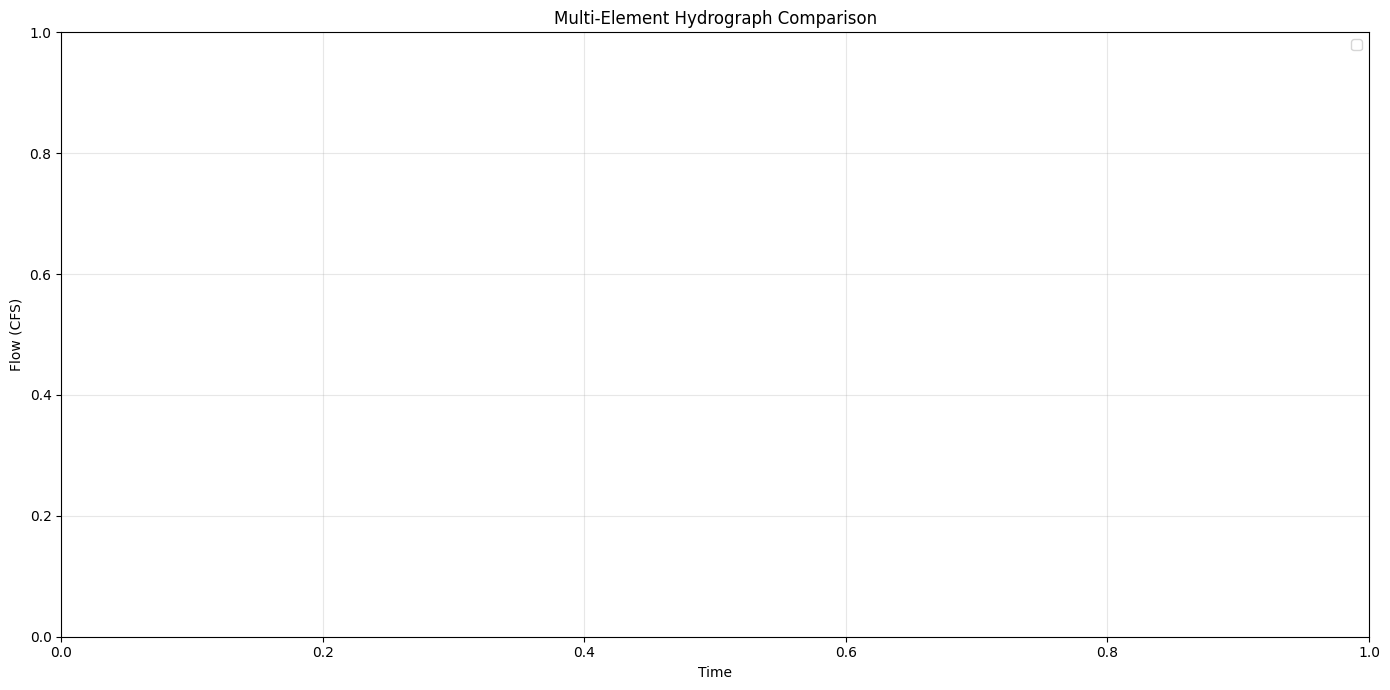

In [13]:
# Plot multiple hydrographs on same figure
try:
    import matplotlib.pyplot as plt
    
    if dss_available and dss_file and dss_file.exists() and len(elements) > 0:
        fig, ax = plt.subplots(figsize=(14, 7))
        
        # Plot up to 5 elements
        for i, elem in enumerate(sorted(elements)[:5]):
            try:
                ts = HmsResults.get_outflow_timeseries(str(dss_file), elem)
                if ts is not None and not ts.empty:
                    ax.plot(ts.index, ts['flow'], linewidth=1.5, label=elem)
            except:
                continue
        
        ax.set_xlabel('Time')
        ax.set_ylabel('Flow (CFS)')
        ax.set_title('Multi-Element Hydrograph Comparison')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
except ImportError:
    print("matplotlib not installed - visualization skipped")
except Exception as e:
    print(f"Could not create multi-element plot: {e}")

## 9. Summary Statistics

In [14]:
if dss_available and dss_file and dss_file.exists():
    print("DSS File Summary:")
    print("=" * 60)
    print(f"  File: {dss_file.name}")
    print(f"  Size: {dss_file.stat().st_size / 1024:.1f} KB")
    print(f"  Total pathnames: {len(catalog)}")
    print(f"  Flow time series: {len(flow_paths)}")
    print(f"  Precip time series: {len(precip_paths)}")
    print(f"  Flow elements: {len(elements)}")
    
    if 'peaks' in dir() and peaks is not None and not peaks.empty:
        print(f"\nPeak Flow Summary:")
        print(f"  Max peak: {peaks['peak_flow'].max():.1f} CFS")
        print(f"  Min peak: {peaks['peak_flow'].min():.1f} CFS")
        print(f"  Elements: {len(peaks)}")

DSS File Summary:
  File: 1970_simulation.dss
  Size: 1288.5 KB
  Total pathnames: 199
  Flow time series: 73
  Precip time series: 36
  Flow elements: 2

Peak Flow Summary:
  Max peak: 927.8 CFS
  Min peak: 927.8 CFS
  Elements: 12


## Troubleshooting DSS Operations

### Common Issues and Solutions

| Error | Cause | Solution |
|-------|-------|----------|
| `DSS operations not available` | pyjnius not installed or Java not found | `pip install pyjnius` and set `JAVA_HOME` |
| `FileNotFoundError` on DSS file | HMS run not executed | Run `HmsCmdr.compute_run()` first |
| `Empty catalog` | DSS file exists but has no data | Check if HMS run completed successfully |
| `KeyError` on pathname | Pathname not in catalog | Use `get_catalog()` to see available paths |
| `TypeError: len() of unsized object` | Empty or malformed DSS record | Skip record or check HMS output logs |

### Checking DSS Availability

```python
# Full diagnostic
from hms_commander import HmsDss

print(f"DSS available: {HmsDss.is_available()}")

# If False, check:
# 1. Java installed: java -version
# 2. JAVA_HOME set: echo %JAVA_HOME%
# 3. pyjnius installed: pip show pyjnius
```

### Finding Missing Data

```python
# List all data in DSS for debugging
catalog = HmsDss.get_catalog(str(dss_file))
print(f"Total records: {len(catalog)}")

# Search for specific element
element = "OUTLET"
matches = [p for p in catalog if element in p]
print(f"Records containing '{element}': {matches}")
```

### DSS Library Downloads

On first use, HEC Monolith libraries are downloaded (~50 MB). This may take 1-2 minutes.
If download fails, check internet connection and firewall settings.

## Summary

This notebook demonstrated DSS operations and results extraction:

| Class | Method | Purpose |
|-------|--------|--------|
| `HmsDss` | `is_available()` | Check if DSS operations are available |
| `HmsDss` | `get_info()` | Get DSS file metadata |
| `HmsDss` | `get_catalog()` | List all pathnames in DSS |
| `HmsDss` | `read_timeseries()` | Read individual time series |
| `HmsResults` | `get_peak_flows()` | Extract peak flows for all elements |
| `HmsResults` | `get_outflow_timeseries()` | Extract full hydrograph |

**Prerequisites**:
- Java 8+ JDK/JRE
- `pyjnius` package
- HEC Monolith libraries (auto-downloaded)

## Next Steps

- **07_execution_jython.ipynb**: Advanced execution patterns
- **08_m3_models.ipynb**: Work with HCFCD M3 models
- **05_clone_workflow.ipynb**: Compare results between scenarios